In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.preprocessing import LabelEncoder
from pandas.core.dtypes.common import is_numeric_dtype
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

# Data Analysis

In [2]:
df = pd.read_excel('insurance.xlsx')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### Dataframe info

In [4]:
df.info

<bound method DataFrame.info of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

### Unique values

In [5]:
df.nunique()

age           47
sex            2
bmi          548
children       6
smoker         2
region         4
charges     1337
dtype: int64

In [6]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [7]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [8]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

# Label Encoding

In [9]:
le = LabelEncoder()

In [10]:
for col in df.columns:
    if (not is_numeric_dtype(df[col])):
        df[col] = le.fit_transform(df[col])

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


## Statistics

In [12]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
sex,1338.0,0.505232,0.500160,0.0000,0.00000,1.000,1.000000,1.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
smoker,1338.0,0.204783,0.403694,0.0000,0.00000,0.000,0.000000,1.00000
region,1338.0,1.515695,1.104885,0.0000,1.00000,2.000,2.000000,3.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


## Correlation

<Axes: >

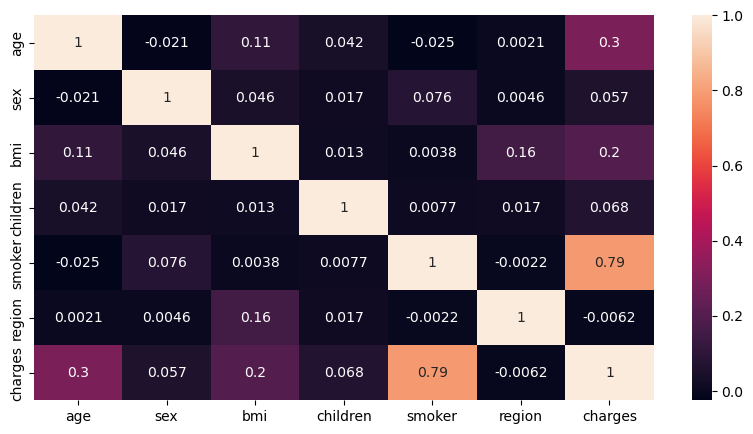

In [13]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True)

# Data Visualization

<Figure size 1200x1200 with 0 Axes>

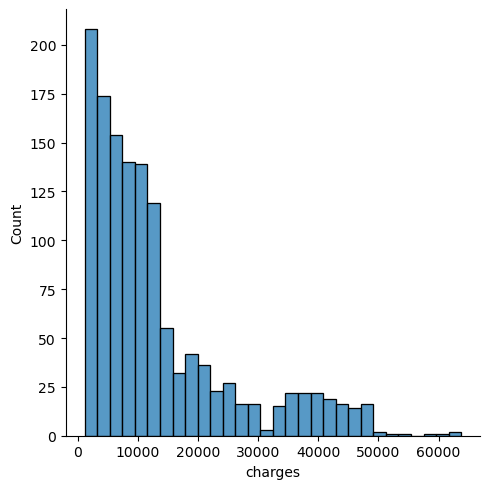

In [14]:
plt.figure(figsize=(12,12))
sns.displot(df['charges'])

## Train data & Test data

In [15]:
x = df.drop('charges',axis=1)
y = df['charges']

In [16]:
xtrain, xtest, ytrain, ytest = tts(x, y, test_size=0.3, random_state=50)

# Linear Regression

In [17]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)

LinearRegression()

In [18]:
reg_pred = reg.predict(xtest)

In [19]:
reg_score = reg.score(xtest,ytest)
reg_score

0.785429999801287

In [20]:
m = reg.coef_
m

array([  251.39431125,  -318.92989923,   302.84862867,   405.25637414,
       23155.11187846,  -160.54816743])

In [21]:
c = reg.intercept_
c

-10819.107038280554

# KNN Regression

In [22]:
knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(xtrain, ytrain)

KNeighborsRegressor(n_neighbors=7)

In [23]:
knn_pred = knn.predict(xtest)

In [24]:
knn_score = knn.score(xtest,ytest)
knn_score

0.15814879462911713

# Errors

#### Linear Regression

In [25]:
reg_mae = mean_absolute_error(ytest, reg_pred)
reg_mae

4052.9728730187626

In [26]:
reg_mse = mean_squared_error(ytest, reg_pred)
reg_mse

35195325.86350661

### KNN Regression

In [27]:
knn_mae = mean_absolute_error(ytest, knn_pred)
knn_mae

8311.82574382445

In [28]:
knn_mse = mean_squared_error(ytest, knn_pred)
knn_mse

138086533.41182116

# Bar plot

In [29]:
data = {'Name':['Linear_mae','Linear_mse','Linear_accuracy','KNN_mae','KNN_mse','KNN_accuracy'],
   'Accuracy':[reg_mae,reg_mse,reg_score,knn_mae,knn_mse,knn_score]}

In [30]:
df_after_pred = pd.DataFrame(data=data)
df_after_pred

,Name,Accuracy
0,Linear_mae,4.052973e+03
1,Linear_mse,3.519533e+07
2,Linear_accuracy,7.854300e-01
3,KNN_mae,8.311826e+03
4,KNN_mse,1.380865e+08
5,KNN_accuracy,1.581488e-01


<Axes: xlabel='Accuracy', ylabel='Name'>

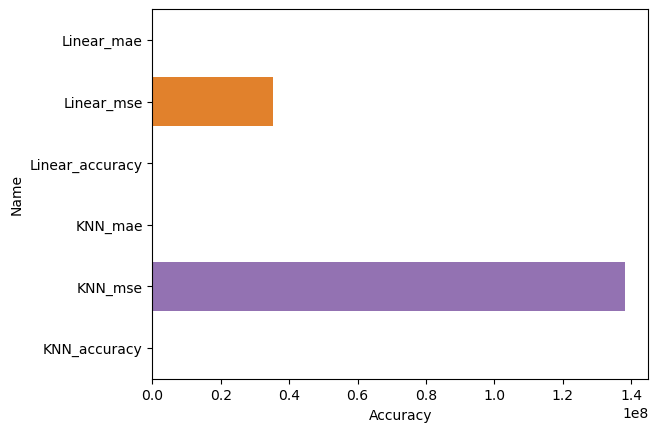

In [31]:
sns.barplot(x='Accuracy',y='Name',data=df_after_pred)